# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

There is also a version of it available on Kaggle [here](https://www.kaggle.com/ronitf/heart-disease-uci).

## 3. Evaluation

> Improve accuracy.

## 4. Features


**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib, Seaborn and Numpy for data analysis and manipulation.

In [95]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with. 

Typical EDA questions might include:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# Let's find out how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

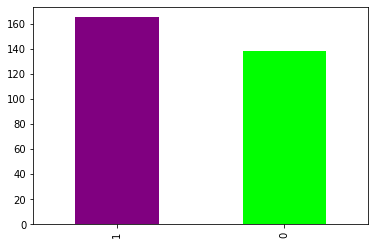

In [6]:
df['target'].value_counts().plot(kind='bar', color=['purple','lime']);

We might want to downsample the dominant class or upsample the rare class, to help with learning its patterns. However, we should only fix the imbalance in training set, without changing the validation and test sets, as these should follow the original distribution. We will perform this task after train/test split.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Let's check correlations between features.

In [10]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

### Heart Disease Frequency according to Sex 

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

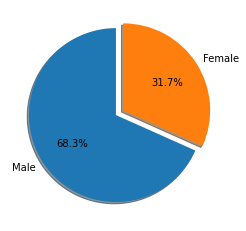

In [12]:
f , ax = plt.subplots()
plt.pie(df["sex"].value_counts(),explode=[0,.1],
        labels=["Male","Female"],startangle=90,shadow=True,autopct = '%1.1f%%');

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

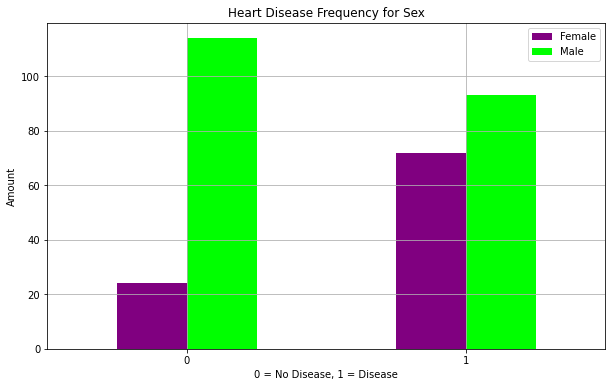

In [14]:
# Creata a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['purple','lime'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.grid()
plt.xticks(rotation=0);

There are more male patients with heart-disease than without. The opposite can be seen for females.

### Age vs. Max Heart Rate for Heart Disease

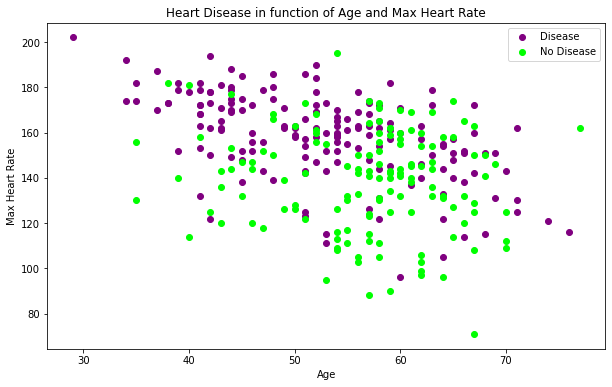

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='purple')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lime')

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

Using Seaborn's `lmplot` to see the linear relation between **Max heart rate achieved** and **age**.

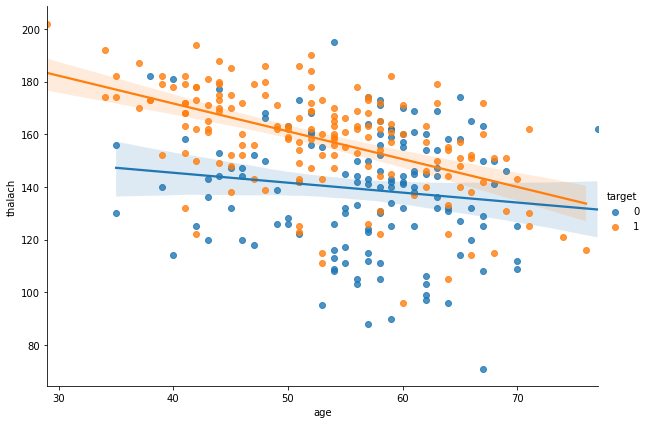

In [16]:
# Create another figure
sns.lmplot(x='age', y = 'thalach', hue='target', data=df, height=6, aspect=11.7/8.27)

The negative slope is expected from the `.corr()` set:

In [17]:
print('Correlation between -thalach- and -age- data:')
df.corr().loc['thalach','age']

Correlation between -thalach- and -age- data:


-0.39852193812106745

<AxesSubplot:xlabel='age'>

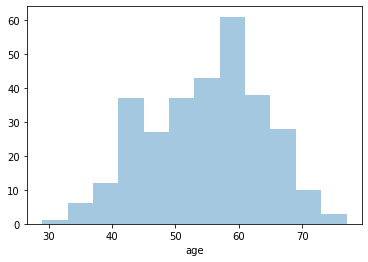

In [18]:
# Check the distribution of the age column with a histogram
sns.distplot(a=df.age, kde=False)

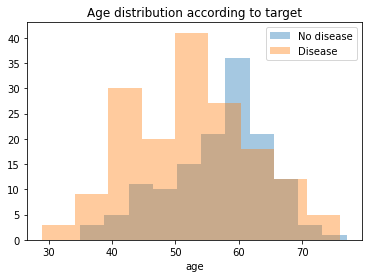

In [19]:
sns.distplot(a=df[df['target']==0].age, kde=False, label='No disease')
sns.distplot(a=df[df['target']==1].age, kde=False, label='Disease')

plt.title('Age distribution according to target')
plt.legend()


Looks like the age distribution for patients with no heart disease has a larger mean value (Was not expecting that).

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related to decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

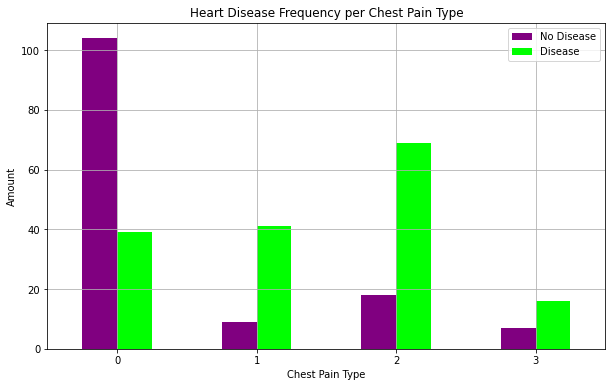

In [21]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['purple','lime'])

# Add some communication
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.grid()
plt.xticks(rotation = 0);

#### Visualize all correlations

Let's make a clean visual of our correlation matrix the get a global idea of all factors.

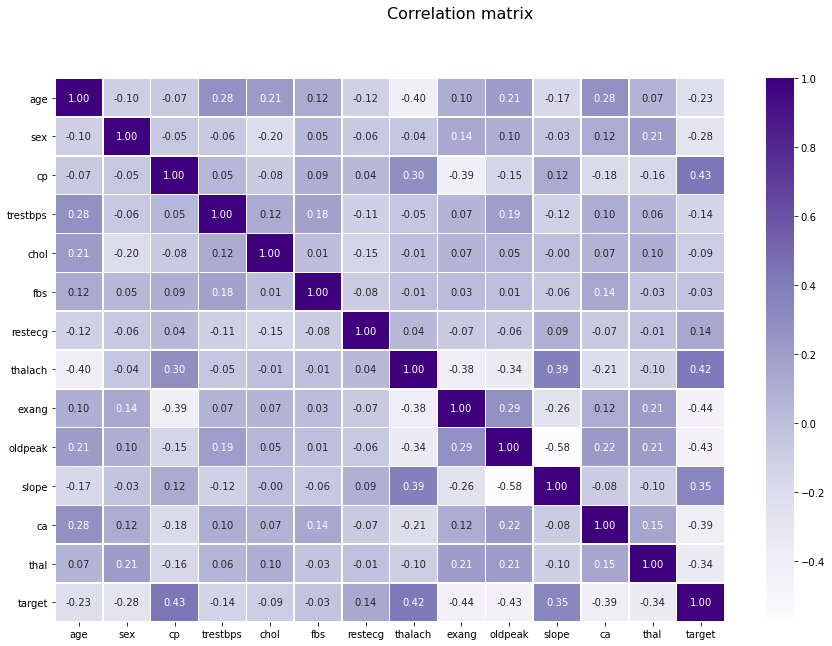

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Correlation matrix', fontsize=16)
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = '.2f',
                 cmap='Purples');


## 5. Modelling

In [23]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

First let's use all features. They are all numeric and there are no missing values. Besides, we will not drop features now as there are no large correlations between any of them.

Let's examine some features:

In [24]:
features_to_check = ['trestbps','chol','thalach']

trestbps


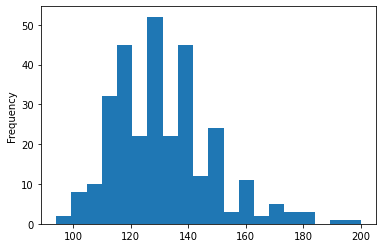

chol


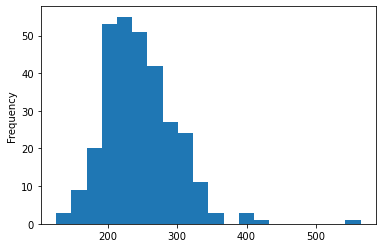

thalach


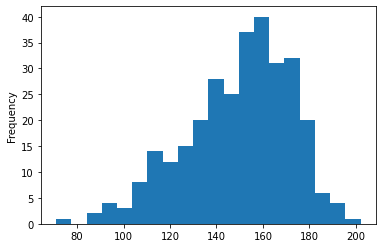

In [25]:
for c in features_to_check:
    print(c)
    df[c].plot.hist(bins=20)
    plt.show()

There seems to be some outliers in the `'chol'` column. Let's examine:

In [26]:
print('Serum cholestoral in mg/dl')
print(df['chol'].value_counts(bins=10, sort=False))

Serum cholestoral in mg/dl
(125.56099999999999, 169.8]     12
(169.8, 213.6]                  73
(213.6, 257.4]                 106
(257.4, 301.2]                  69
(301.2, 345.0]                  35
(345.0, 388.8]                   3
(388.8, 432.6]                   4
(432.6, 476.4]                   0
(476.4, 520.2]                   0
(520.2, 564.0]                   1
Name: chol, dtype: int64


That one patient with a cholesterol over 520 is very off. Let's find more about it:

In [27]:
df[df['chol']>500]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
85   67    0   2       115   564    0        0      160      0      1.6   

    slope  ca  thal  target  
85      1   0     3       1

The patient is a 67 years old female with heart disease. As a value of 200 is considered concerning, this appears to be very odd.

In [28]:
df = df[df['chol']<520]

Let's confirm that outlier is gone from `df`:

In [29]:
print('Serum cholestoral in mg/dl')
print(df['chol'].value_counts(bins=10, sort=False))

Serum cholestoral in mg/dl
(125.708, 155.1]     5
(155.1, 184.2]      22
(184.2, 213.3]      58
(213.3, 242.4]      69
(242.4, 271.5]      68
(271.5, 300.6]      38
(300.6, 329.7]      28
(329.7, 358.8]       9
(358.8, 387.9]       1
(387.9, 417.0]       4
Name: chol, dtype: int64


trestbps


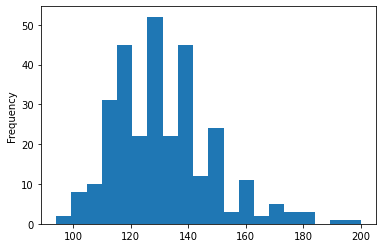

chol


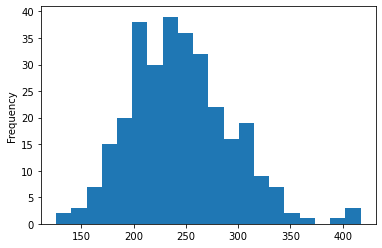

thalach


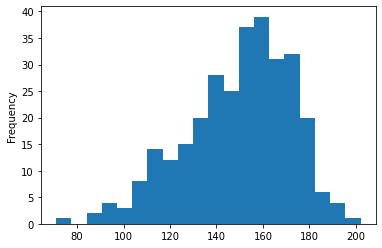

In [30]:
for c in features_to_check:
    print(c)
    df[c].plot.hist(bins=20)
    plt.show()

Now, let's define our features and target sets.

In [31]:
num_features=['trestbps','chol','thalach','oldpeak']

In [103]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [104]:
X[:10]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
5   0     1  
6   0     2  
7   0     3  
8   0     3  
9   0     2

In [105]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [106]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=28)

In [107]:
X_train[:10]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
115   37    0   2       120   215    0        1      170      0      0.0   
223   56    0   0       200   288    1        0      133      1      4.0   
195   59    1   0       170   326    0        0      140      1      3.4   
215   43    0   0       132   341    1        0      136      1      3.0   
51    66    1   0       120   302    0        0      151      0      0.4   
73    51    1   0       140   261    0        0      186      1      0.0   
219   48    1   0       130   256    1        0      150      1      0.0   
254   59    1   3       160   273    0        0      125      0      0.0   
283   40    1   0       152   223    0        1      181      0      0.0   
97    52    1   0       108   233    1        1      147      0      0.1   

     slope  ca  thal  
115      2   0     2  
223      0   2     3  
195      0   0     3  
215      1   0     3  
51       1   0     2  
73       2   0     2  
219      2   2     3  
254      2   0     2  
283      2   0     3  
97       2   3     3

In [108]:
y_train, len(y_train)

(115    1
 223    0
 195    0
 215    0
 51     1
       ..
 260    0
 32     1
 279    0
 5      1
 258    0
 Name: target, Length: 241, dtype: int64,
 241)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [109]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learning machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_: test labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep mpdel scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [110]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/home/bruno/miniconda3/envs/MLProjects/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.7704918032786885}

## Model Comparison

In [111]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

Logistic Regression       KNN  Random Forest
accuracy             0.803279  0.606557       0.770492

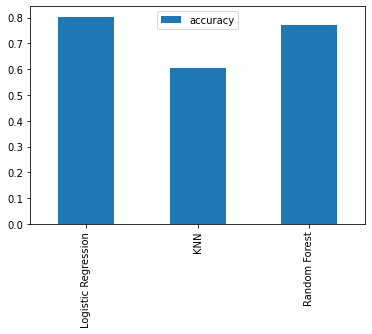

In [112]:
model_compare.T.plot.bar();

### Scaling our data

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=28)

# Scaling
scaler = StandardScaler().fit(X_train)

XS_train = scaler.transform(X_train)
XS_test = scaler.transform(X_test)

# print(XS_train.mean(axis=0))
# print(XS_train.std(axis=0))

In [115]:
model_scores = fit_and_score(models=models,
                             X_train=XS_train,
                             X_test=XS_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.8032786885245902,
 'Random Forest': 0.7704918032786885}

In [116]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

Logistic Regression       KNN  Random Forest
accuracy             0.803279  0.803279       0.770492

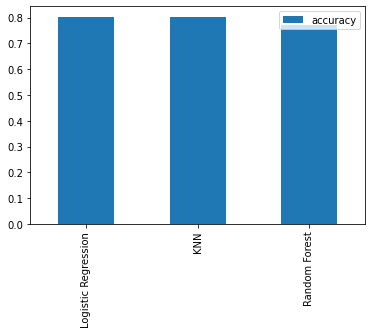

In [117]:
model_compare.T.plot.bar();

We got rid of the warning and had a significant improvement in the KNN accuracy.

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [118]:
# Let's tune KNN
def tune_knn(X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []

    # Create a list of different values for n-neighbors
    neighbors = range(1,21)

    # Setup KNN instance
    knn = KNeighborsClassifier()

    # Loop through different n_neighbors
    for i in neighbors:
        knn.set_params(n_neighbors=i)

        # Fit the algorithm
        knn.fit(X_train, y_train)

        # Update the training score list
        train_scores.append(knn.score(X_train, y_train))

        # Update the test scores list
        test_scores.append(knn.score(X_test, y_test))

    plt.plot(neighbors, train_scores, label='Train scores')
    plt.plot(neighbors, test_scores, label='Test scores')
    plt.xticks(np.arange(1,21,1))
    plt.xlabel('Number of neighbors')
    plt.ylabel('Model score')
    plt.legend()

    print(f'Maximum KNN score on the test set: {max(test_scores)*100:.2f}%')
    print(f'Number of neighbors of maximum KNN score on the test set: {test_scores.index(max(test_scores))+1}')

Maximum KNN score on the test set: 81.97%
Number of neighbors of maximum KNN score on the test set: 4


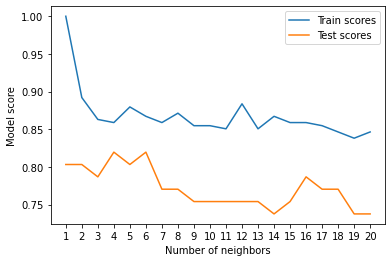

In [119]:
tune_knn(XS_train, XS_test, y_train, y_test)

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [51]:
# Create hyperparameter grid for LogisticRegression
from sklearn.utils.fixes import loguniform

log_reg_grid = {'C': loguniform(1e0, 1e3),
                'solver':['liblinear','lbfgs']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 100, 5),
           'max_depth': [None, 1, 3, 5, 10],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [52]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search to model for LogisticRegression
rs_log_reg.fit(XS_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75b5c723d0>,
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [53]:
rs_log_reg.best_params_

{'C': 1.0053940194693016, 'solver': 'lbfgs'}

In [54]:
rs_log_reg.score(XS_test, y_test)

0.8032786885245902

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [55]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fot the random hyperparameter search model for RandomForestClassifier
rs_rf.fit(XS_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 1, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [56]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 35,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3}

In [57]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(XS_test, y_test)

0.8032786885245902

In [58]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.8032786885245902,
 'Random Forest': 0.7704918032786885}

It appears the default parameters are already doing a great job!

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [59]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': [1, 10, 100, 1000],
                'solver':['liblinear','lbfgs']}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(XS_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [60]:
# Check best parameters
gs_log_reg.best_params_

{'C': 1, 'solver': 'liblinear'}

In [61]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(XS_test, y_test)

0.8032786885245902

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [62]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(XS_test)

In [63]:
y_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [64]:
y_test

87     1
33     1
229    0
156    1
204    0
      ..
188    0
239    0
249    0
58     1
208    0
Name: target, Length: 61, dtype: int64

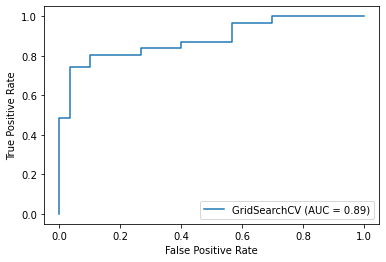

In [65]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, XS_test, y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix

In [66]:
print(confusion_matrix(y_test, y_preds))

[[24  6]
 [ 6 25]]


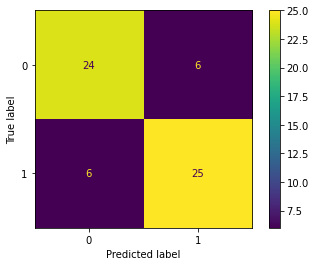

In [67]:
plot_confusion_matrix(gs_log_reg, XS_test, y_test);

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

### Classification report

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



Let's get a refresh.

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [69]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1, 'solver': 'liblinear'}

In [70]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 1,
                         solver='liblinear')

In [71]:
# Corss-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.83606557, 0.86885246, 0.83333333, 0.86666667, 0.75      ])

In [72]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8309836065573771

In [73]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8249703798090895

In [74]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.8840909090909091

In [75]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508615582383188

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

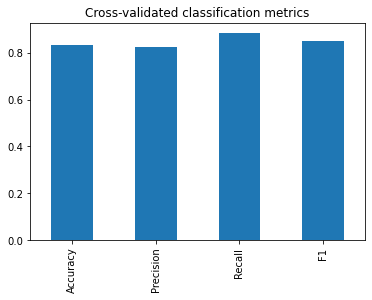

In [76]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend = False)

### Feature Importance

Feature importance is another way of as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [77]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 1,
                         solver='liblinear')
clf.fit(XS_train, y_train);

In [78]:
# Check coef_
clf.coef_

array([[-0.14261477, -0.7692879 ,  0.93104729, -0.34510169, -0.24128304,
         0.03510278,  0.15496841,  0.64426525, -0.22013698, -0.65328694,
         0.50993495, -0.88879664, -0.46093437]])

In [79]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [80]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.14261477135086553,
 'sex': -0.7692879036921341,
 'cp': 0.9310472915469417,
 'trestbps': -0.3451016897629052,
 'chol': -0.24128304309836118,
 'fbs': 0.03510277932072928,
 'restecg': 0.15496840708202314,
 'thalach': 0.644265253402707,
 'exang': -0.2201369752856793,
 'oldpeak': -0.6532869362799312,
 'slope': 0.5099349491260111,
 'ca': -0.8887966421767717,
 'thal': -0.4609343662351113}

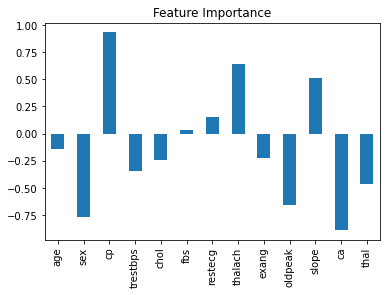

In [81]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [82]:
pd.crosstab(df.sex, df.target)

target    0   1
sex            
0        24  71
1       114  93

In [83]:
pd.crosstab(df.slope, df.target)

target   0    1
slope          
0       12    9
1       91   48
2       35  107

slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## Let's try to improve by finding the categorical features

In [121]:
categorical_feats = []
continuous_feats = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_feats.append(column)
    else:
        continuous_feats.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 68 67 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 277 214 248 255 207
 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271 268
 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224 206
 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307 249
 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218 319
 166 311 169 187 176 241 131]
fbs : [1 

In [122]:
categorical_feats

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [123]:
continuous_feats

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Formatting the data to create dummy columns for categorical values:

In [124]:
categorical_feats.remove('target')
df2 = pd.get_dummies(df, columns=categorical_feats)

df2.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0   63       145   233      150      2.3       1      0      1     0     0   
1   37       130   250      187      3.5       1      0      1     0     0   
2   41       130   204      172      1.4       1      1      0     0     1   
3   56       120   236      178      0.8       1      0      1     0     1   
4   57       120   354      163      0.6       1      1      0     1     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]

In [125]:
df2.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

### Modelling

In [160]:
X = df2.drop('target', axis = 1)
y = df2.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=28)

## Scaling

In [161]:
scaler = preprocessing.StandardScaler()

X_train[continuous_feats] = scaler.fit_transform(X_train[continuous_feats])
X_test[continuous_feats] = scaler.transform(X_test[continuous_feats])


<ipython-input-161-0749776556fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[continuous_feats] = scaler.fit_transform(X_train[continuous_feats])
/home/bruno/miniconda3/envs/MLProjects/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-161-0749776556fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [162]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'Random Forest': RandomForestClassifier(),
          'SVC': SVC()}

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7704918032786885,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.8360655737704918}

## Hyperparameter tuning

#### KNN

Maximum KNN score on the test set: 83.61%
Number of neighbors of maximum KNN score on the test set: 4


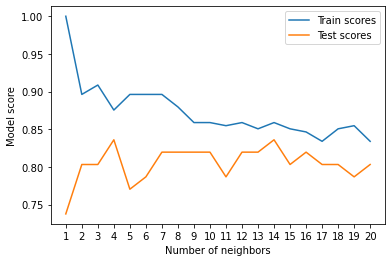

In [136]:
# Let's tune KNN
tune_knn(X_train, X_test, y_train, y_test)

##### LogReg

Tuning Logistic Regression, as it has the best score so far:

In [166]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-5, 5, 20),
                'solver':['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [167]:
# Check best parameters
print(gs_log_reg.best_params_)

gs_log_reg.score(X_test, y_test)

{'C': 0.5455594781168515, 'solver': 'liblinear'}


0.8524590163934426

#### SVC

In [151]:
# Setup grid for SVC
svc_grid={"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

# Setup grid hyperparameter search for LogisticRegression
gs_svc = GridSearchCV(SVC(),
                      param_grid=svc_grid,
                      cv=5,
                      verbose=True)

# Fit grid hyperparameter search model
gs_svc.fit(X_train, y_train);

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed:    4.2s finished


In [152]:
# Check best parameters
print(gs_svc.best_params_)

gs_svc.score(X_test, y_test)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


0.8360655737704918

#### RandomForest

In [163]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=28)

rscv_rf = RandomizedSearchCV(estimator=rand_forest,
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=3,
                             verbose=2,
                             random_state=28,
                             n_jobs=-1)

# Fit random hyperparameter search to model for RandomForest
rscv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=28),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=28, verbose=2)

In [164]:
rscv_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [168]:
RF = RandomForestClassifier(n_estimators = 200,
                            min_samples_split = 10,
                            min_samples_leaf = 2,
                            max_features = 'auto',
                            max_depth = 20,
                            bootstrap = True)

In [169]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [170]:
RF.score(X_test, y_test)

0.819672131147541